### Universidad Politécnica Salesiana
**Nombre:** david leon

**Materia:** Simulación

Enunciado:
-   Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
    ◦   Se tiene los datos del ecuador (https://github.com/andrab/ecuacovid/tree/master/datos_crudos). 
    En base a ello obtener los siguientes modelos:
        ▪   Generar graficas para entender y procesar los datos:
            •   Generar graficas y reportes del total de personas  vacunadas.

In [1]:

#importar las librerias necesarias
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd

In [2]:
vacunas = pd.read_csv('vacunas.csv')
#imprimir los primeros 5 datos del archivo
vacunas.head(5)


,fecha,dosis_total,primera_dosis,segunda_dosis
0,21/01/2021,0,0,0
1,22/01/2021,108,108,0
2,27/01/2021,2982,2982,0
3,04/02/2021,6228,6228,0
4,17/02/2021,8190,6228,1962


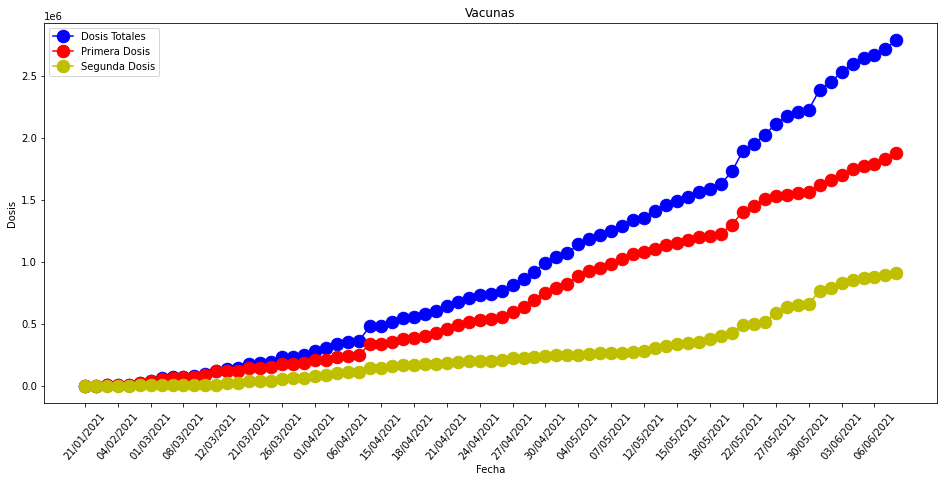

In [3]:
plt.figure(figsize=(16,7))

plt.title('Vacunas')

plt.plot(vacunas.fecha, vacunas.dosis_total, 'b.-', markersize=25,label='Dosis Totales')
plt.plot(vacunas.fecha, vacunas.primera_dosis, 'r.-', markersize=25, label='Primera Dosis')
plt.plot(vacunas.fecha, vacunas.segunda_dosis, 'y.-', markersize=25, label='Segunda Dosis')

plt.xticks(vacunas.fecha[::3].tolist())

plt.xlabel('Fecha')
plt.xticks(rotation=50)
plt.ylabel('Dosis')
plt.legend()
plt.show()

In [4]:
vacunas_planvacunarse = pd.read_csv('vacunas_planvacunarse.csv')
#imprimir los primeros 5 datos del archivo
vacunas_planvacunarse.head(5)

,fecha,primera_dosis,segunda_dosis
0,2021-01-21,1500,0
1,2021-01-22,539,1
2,2021-01-23,31,0
3,2021-01-24,0,0
4,2021-01-25,622,0


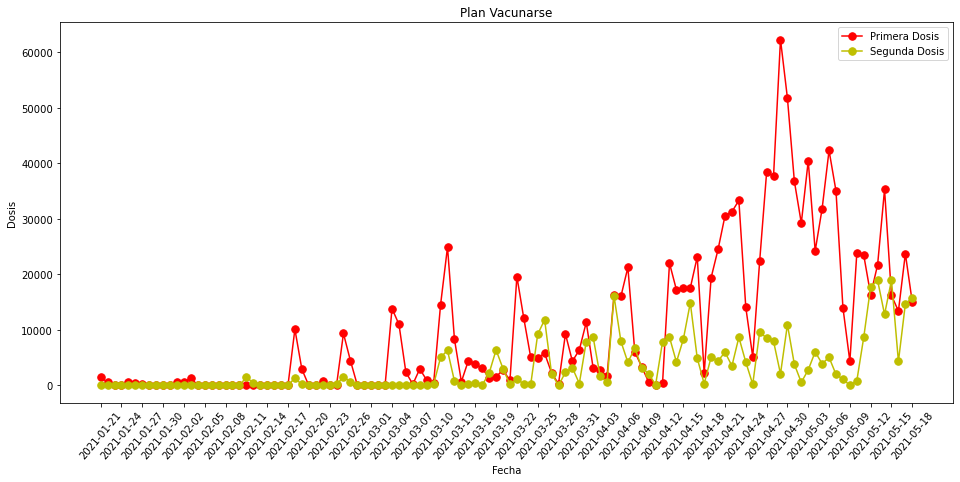

In [5]:
plt.figure(figsize=(16,7))

plt.title('Plan Vacunarse')


plt.plot(vacunas_planvacunarse.fecha, vacunas_planvacunarse.primera_dosis, 'r.-', markersize=15, label='Primera Dosis')
plt.plot(vacunas_planvacunarse.fecha, vacunas_planvacunarse.segunda_dosis, 'y.-', markersize=15, label='Segunda Dosis')

plt.xticks(vacunas_planvacunarse.fecha[::3].tolist())

plt.xlabel('Fecha')
plt.xticks(rotation=50)
plt.ylabel('Dosis')
plt.legend()
plt.show()

In [6]:
#Trabajar con datos en formato .csv
fabricantes = pd.read_csv('fabricantes.csv',sep=',')
#imprimir los primeros 5 datos del archivo
fabricantes.head(18)

,vaccine,total,arrived_at,contract
0,Pfizer/BioNTech,8190,20/01/2021,Government of Ecuador with Pfizer
1,Pfizer/BioNTech,16380,17/02/2021,Government of Ecuador with Pfizer
2,Pfizer/BioNTech,17550,24/02/2021,Government of Ecuador with Pfizer
3,Pfizer/BioNTech,31590,03/03/2021,Government of Ecuador with Pfizer
4,Sinovac,20000,06/03/2021,Donation from the Government of Chile to the G...
5,Pfizer/BioNTech,73710,10/03/2021,Government of Ecuador with Pfizer
6,Oxford/AstraZeneca,84000,17/03/2021,Government of Ecuador with COVAX
7,Pfizer/BioNTech,62010,17/03/2021,Government of Ecuador with Pfizer
8,Pfizer/BioNTech,65520,24/03/2021,Government of Ecuador with Pfizer
9,Pfizer/BioNTech,66690,31/03/2021,Government of Ecuador with Pfizer


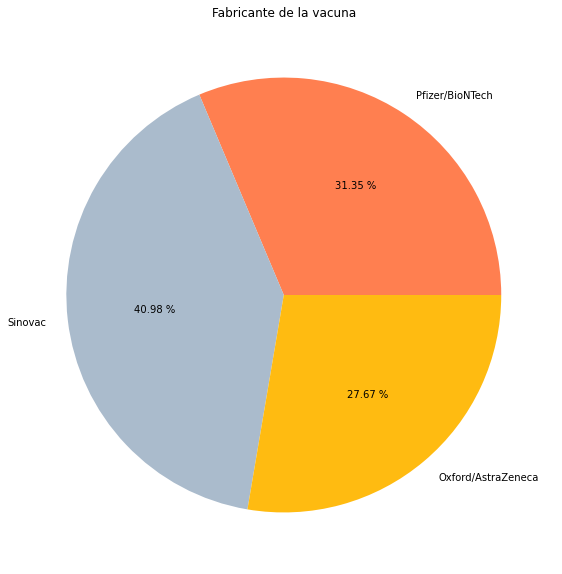

In [7]:
# Generar un grafico de cual es su pie diestro
aux = 0
aux1 = 0
aux2 = 0
vaccine1 = fabricantes.loc[fabricantes.vaccine == 'Pfizer/BioNTech']['total']
for i in vaccine1:
    aux = aux+i
    
vaccine2 = fabricantes.loc[fabricantes.vaccine == 'Sinovac']['total']
for i in vaccine2:
    aux1 = aux1+i
    
vaccine3 = fabricantes.loc[fabricantes.vaccine == 'Oxford/AstraZeneca']['total']
for i in vaccine3:
    aux2 = aux2+i
    
plt.figure(figsize=(10,10))

etiquetas = ['Pfizer/BioNTech', 'Sinovac','Oxford/AstraZeneca']
colores = ['#ff7f50', '#aabbcc','#ffbb11']
plt.pie([aux,aux1,aux2], labels=etiquetas, colors=colores, autopct='%.2f %%')
plt.title('Fabricante de la vacuna')
plt.show()

In [8]:
sumaTotalVacunas = aux + aux1 +aux2
print(sumaTotalVacunas)

4206189


In [9]:
fabricantes['arrived_at'] = pd.to_datetime(fabricantes['arrived_at'], format='%d/%m/%Y')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
j = 1000

In [10]:
listae =[]
listae1 =[]
listae2 =[]

enero = fabricantes.loc[fabricantes.arrived_at.dt.month == 1]

for i in enero['arrived_at']:
    date_time = i
    d = date_time.strftime("%m/%d/%Y")
    listae.append(d)
print(listae)

for i in enero['total']:
    listae1.append(int(i))
print(listae1)

for i in enero['vaccine']:
    listae2.append((i))
print(listae2)

['01/20/2021']
[8190]
['Pfizer/BioNTech']


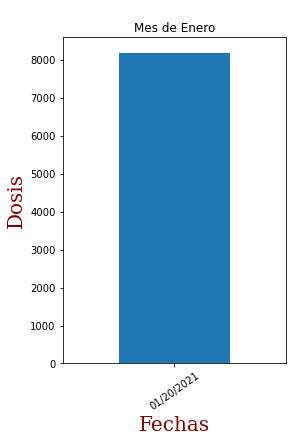

In [11]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (4,6))

# Annotating the bar plot with the values (Fabricantes)
for i in range(len(listae)):
    plt.annotate(listae2[i]+' '+str(listae1[i]), (-0.25 + i, listae1[i] + j))

plt.title("Mes de Enero")
freq_series = pd.Series(listae1)
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(listae, rotation = 35)
plt.xlabel('Fechas', fontsize=20, fontdict=font)
plt.ylabel('Dosis', fontsize=20, fontdict=font)
# Saving the plot as a 'png'
plt.savefig('Enero.png')

In [12]:

listaf =[]
listaf1 =[]
listaf2 =[]

febrero = fabricantes.loc[fabricantes.arrived_at.dt.month == 2]

for i in febrero['arrived_at']:
    date_time = i
    d = date_time.strftime("%m/%d/%Y")
    listaf.append(d)
print(listaf)

for i in febrero['total']:
    listaf1.append(int(i))
print(listaf1)

for i in febrero['vaccine']:
    listaf2.append((i))
print(listaf2)

['02/17/2021', '02/24/2021']
[16380, 17550]
['Pfizer/BioNTech', 'Pfizer/BioNTech']


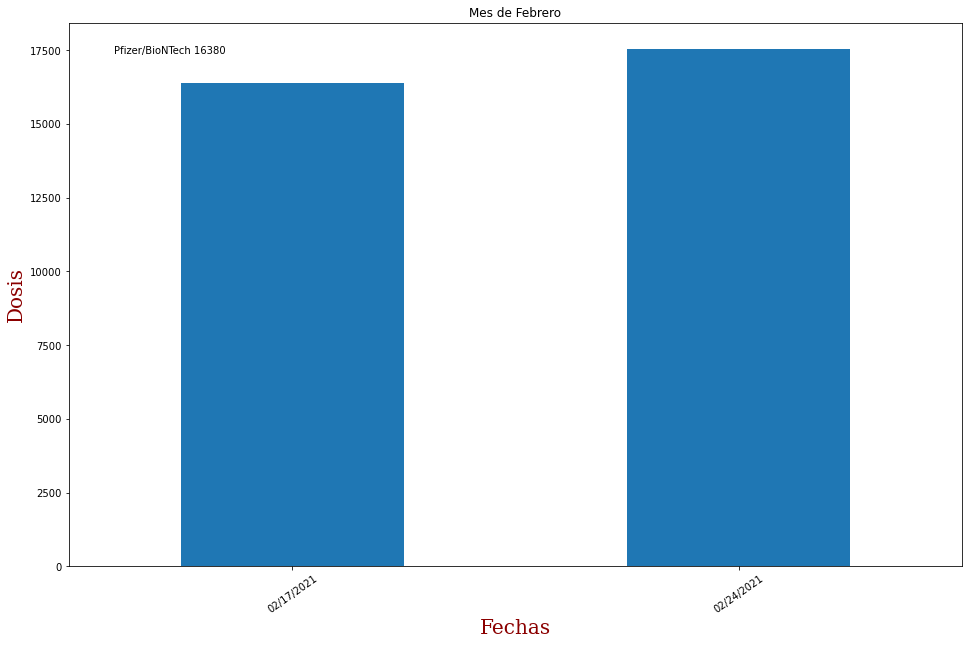

In [13]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (16,10))

# Annotating the bar plot with the values (Fabricantes)
for i in range(len(listaf)):
    plt.annotate(listaf2[i]+' '+str(listaf1[i]), (-0.4 + i, listaf1[i] + j))

plt.title("Mes de Febrero")
freq_series = pd.Series(listaf1)
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(listaf, rotation = 35)
plt.xlabel('Fechas', fontsize=20, fontdict=font)
plt.ylabel('Dosis', fontsize=20, fontdict=font)
# Saving the plot as a 'png'
plt.savefig('Febrero.png')

In [14]:
lista =[]
lista1 =[]
lista2 =[]

marzo = fabricantes.loc[fabricantes.arrived_at.dt.month == 3]

for i in marzo['arrived_at']:
    date_time = i
    d = date_time.strftime("%m/%d/%Y")
    lista.append(d)
print(lista)

for i in marzo['total']:
    lista1.append(int(i))
print(lista1)

for i in marzo['vaccine']:
    lista2.append((i))
print(lista2)

['03/03/2021', '03/06/2021', '03/10/2021', '03/17/2021', '03/17/2021', '03/24/2021', '03/31/2021']
[31590, 20000, 73710, 84000, 62010, 65520, 66690]
['Pfizer/BioNTech', 'Sinovac', 'Pfizer/BioNTech', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Pfizer/BioNTech', 'Pfizer/BioNTech']


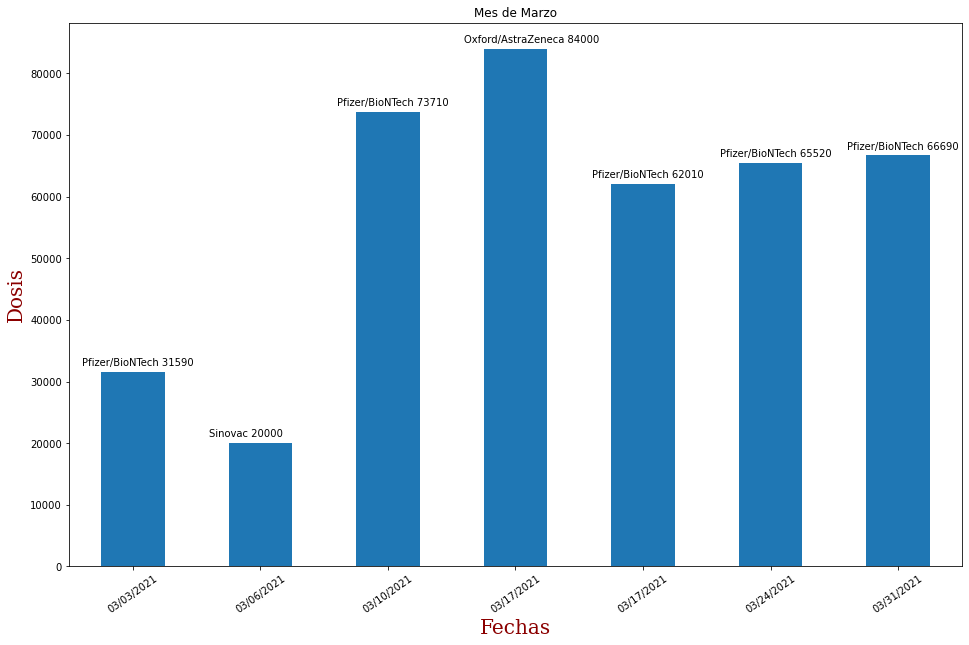

In [15]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (16,10))

# Annotating the bar plot with the values (Fabricantes)
for i in range(len(lista)):
    plt.annotate(lista2[i]+' '+str(lista1[i]), (-0.4 + i, lista1[i] + j))

plt.title("Mes de Marzo")
freq_series = pd.Series(lista1)
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(lista, rotation = 35)
plt.xlabel('Fechas', fontsize=20, fontdict=font)
plt.ylabel('Dosis', fontsize=20, fontdict=font)
# Saving the plot as a 'png'
plt.savefig('Marzo.png')

In [16]:
listaa =[]
listaa1 =[]
listaa2 =[]

abril = fabricantes.loc[fabricantes.arrived_at.dt.month == 4]

for i in abril['arrived_at']:
    date_time = i
    d = date_time.strftime("%m/%d/%Y")
    listaa.append(d)
print(listaa)

for i in abril['total']:
    listaa1.append(int(i))
print(listaa1)

for i in abril['vaccine']:
    listaa2.append((i))
print(listaa2)

['04/05/2021', '04/07/2021', '04/10/2021', '04/14/2021', '04/21/2021', '04/24/2021', '04/28/2021']
[53820, 300000, 700000, 53820, 54990, 336000, 54990]
['Pfizer/BioNTech', 'Sinovac', 'Sinovac', 'Pfizer/BioNTech', 'Pfizer/BioNTech', 'Oxford/AstraZeneca', 'Pfizer/BioNTech']


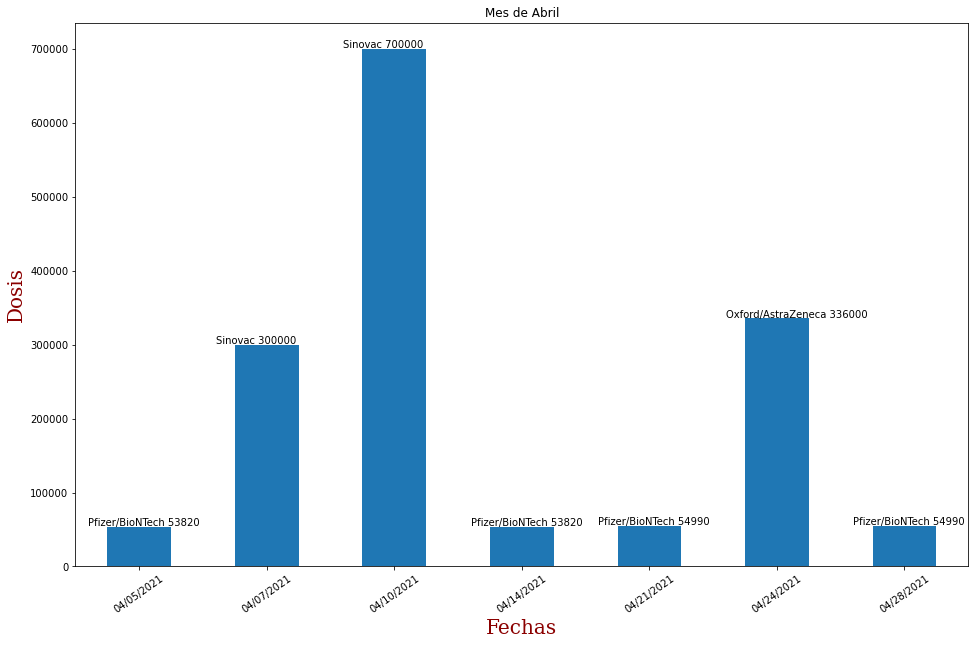

In [17]:

# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (16,10))

# Annotating the bar plot with the values (Fabricantes)
for i in range(len(listaa)):
    plt.annotate(listaa2[i]+' '+str(listaa1[i]), (-0.4 + i, listaa1[i] + j))

plt.title("Mes de Abril")
freq_series = pd.Series(listaa1)
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(listaa, rotation = 35)
plt.xlabel('Fechas', fontsize=20, fontdict=font)
plt.ylabel('Dosis', fontsize=20, fontdict=font)
# Saving the plot as a 'png'
plt.savefig('Abril.png')

In [18]:

listam =[]
listam1 =[]
listam2 =[]

mayo = fabricantes.loc[fabricantes.arrived_at.dt.month == 5]

for i in mayo['arrived_at']:
    date_time = i
    d = date_time.strftime("%m/%d/%Y")
    listam.append(d)
print(listam)

for i in mayo['total']:
    listam1.append(int(i))
print(listam1)

for i in mayo['vaccine']:
    listam2.append((i))
print(listam2)

['05/04/2021', '05/11/2021', '05/16/2021', '05/18/2021', '05/22/2021', '05/25/2021', '05/29/2021', '05/29/2021']
[100620, 100689, 3520, 170820, 204000, 170820, 500000, 200000]
['Pfizer/BioNTech', 'Pfizer/BioNTech', 'Sinovac', 'Pfizer/BioNTech', 'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinovac', 'Sinovac']


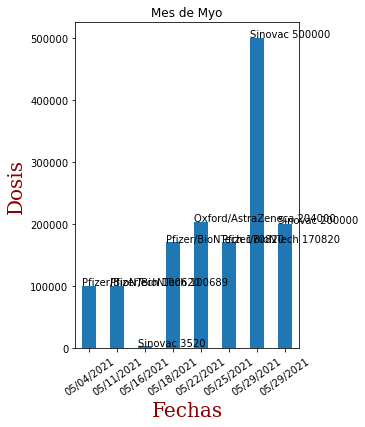

In [19]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (4,6))

# Annotating the bar plot with the values (Fabricantes)
for i in range(len(listam)):
    plt.annotate(listam2[i]+' '+str(listam1[i]), (-0.25 + i, listam1[i] + j))

plt.title("Mes de Myo")
freq_series = pd.Series(listam1)
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(listam, rotation = 35)
plt.xlabel('Fechas', fontsize=20, fontdict=font)
plt.ylabel('Dosis', fontsize=20, fontdict=font)
# Saving the plot as a 'png'
plt.savefig('Mayo.png')

   Generar un reporte parametrizado que pueda ingresar los datos de las fechas inicio y fin para
        obtener la información de las graficas vistas en el primer punto.

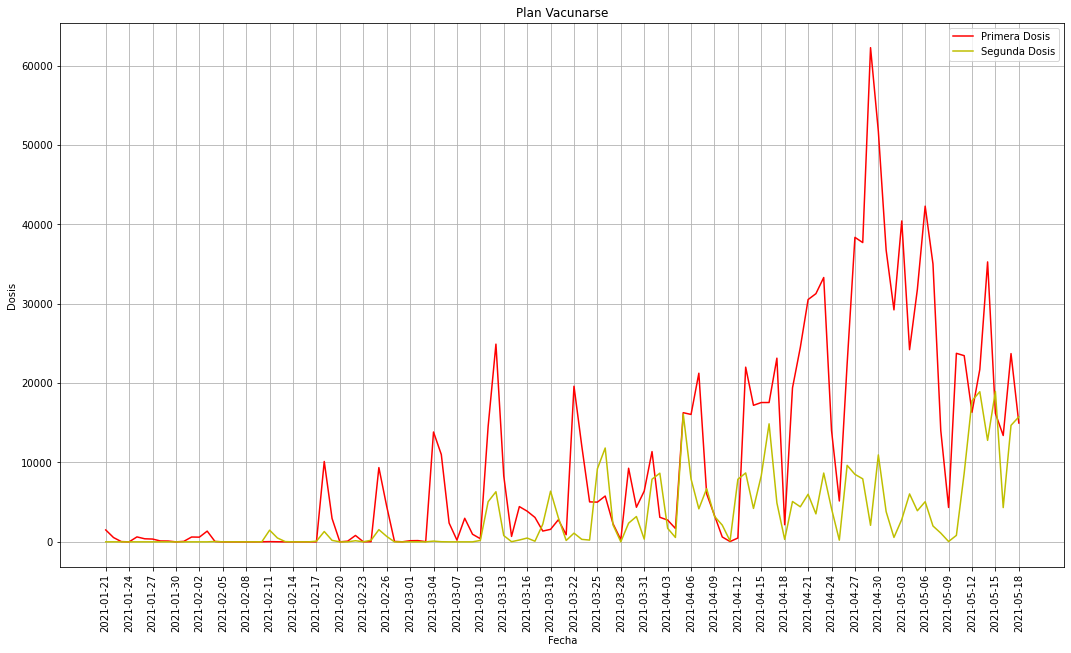

In [20]:
plt.figure(figsize=(18,10))

plt.title('Plan Vacunarse')
plt.plot(vacunas_planvacunarse.fecha, vacunas_planvacunarse.primera_dosis, 'r-', markersize=5, label='Primera Dosis')
plt.plot(vacunas_planvacunarse.fecha, vacunas_planvacunarse.segunda_dosis, 'y-', markersize=25, label='Segunda Dosis')

plt.xticks(vacunas_planvacunarse.fecha[::3].tolist())

plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.ylabel('Dosis')
plt.legend()
plt.grid(True)
plt.show()

 Generar un modelo matemático de predicción para regresión lineal, exponencial, polinómico y 
        logarítmico, del procesos de vacunación en base al numero actual de vacunados (1 y 2 dosis) y a la 
        llegada de nuevas vacunas.

In [21]:
vacunas_planvacunarse = pd.read_csv('vacunas_planvacunarse.csv')
#imprimir los primeros 5 datos del archivo
vacunas_planvacunarse.head(5)

,fecha,primera_dosis,segunda_dosis
0,2021-01-21,1500,0
1,2021-01-22,539,1
2,2021-01-23,31,0
3,2021-01-24,0,0
4,2021-01-25,622,0


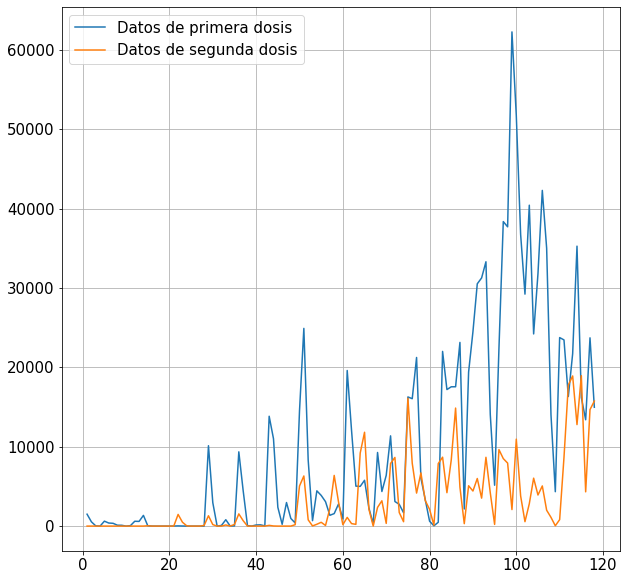

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model

#x = range(1,len(vacunas_planvacunarse)+1)
#y = vacunas_planvacunarse

#vacunas_planvacunarse['fecha'] = vacunas_planvacunarse['fecha'].str.replace('-','/')
#vacunas_planvacunarse['fecha'] = vacunas_planvacunarse['fecha'].astype(float)

start_date = "2021/01/20"

plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)
#confirmados = vacunas_planvacunarse.iloc[:105].loc[start_date:]
#vaccine2 = fabricantes.loc[fabricantes.vaccine == 'Sinovac']['total']
primera_dosis = vacunas_planvacunarse.loc[:]['primera_dosis']
segunda_dosis = vacunas_planvacunarse.loc[:]['segunda_dosis']
#print(confirmados)

x = range(1,len(primera_dosis)+1)
y = primera_dosis
z = segunda_dosis

plt.plot(x, y, label = "Datos de primera dosis")
plt.plot(x, z, label = "Datos de segunda dosis")
plt.legend()
plt.grid(True)
plt.show()

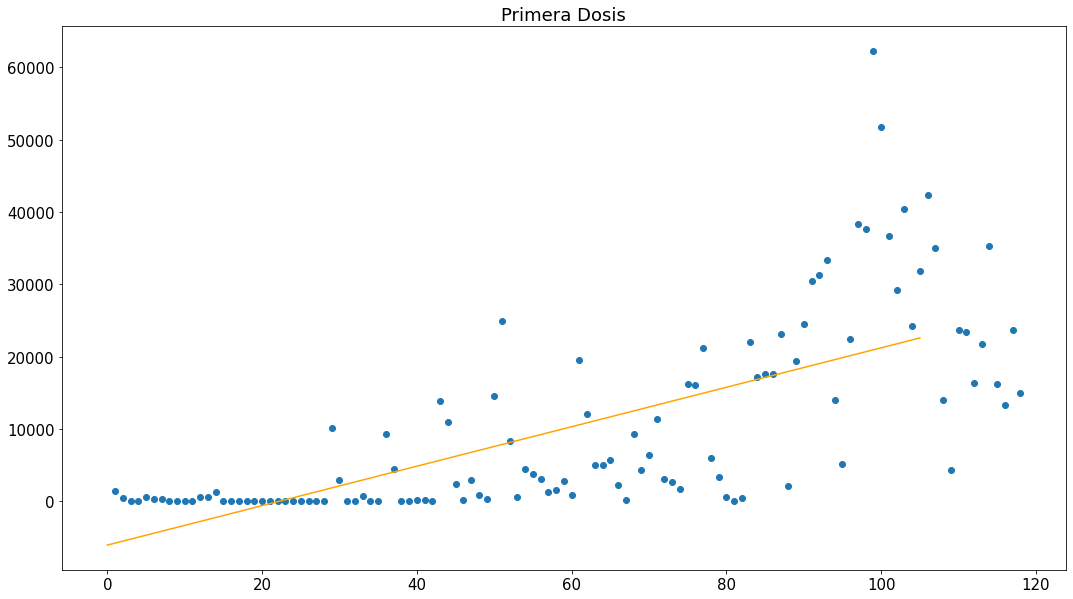

prediccion lineal para el 1 dia despues de la primera dosis: 22331.303017686863
prediccion lineal para los 2 dias despues de la segunda dosis: 22603.989697573947
[-6028.11169057 -5755.42501068 -5482.7383308  -5210.05165091
 -4937.36497102 -4664.67829113 -4391.99161125 -4119.30493136
 -3846.61825147 -3573.93157159 -3301.2448917  -3028.55821181
 -2755.87153192 -2483.18485204 -2210.49817215 -1937.81149226
 -1665.12481238 -1392.43813249 -1119.7514526   -847.06477271
  -574.37809283  -301.69141294   -29.00473305   243.68194683
   516.36862672   789.05530661  1061.74198649  1334.42866638
  1607.11534627  1879.80202616  2152.48870604  2425.17538593
  2697.86206582  2970.5487457   3243.23542559  3515.92210548
  3788.60878537  4061.29546525  4333.98214514  4606.66882503
  4879.35550491  5152.0421848   5424.72886469  5697.41554458
  5970.10222446  6242.78890435  6515.47558424  6788.16226412
  7060.84894401  7333.5356239   7606.22230378  7878.90898367
  8151.59566356  8424.28234345  8696.96902333

In [23]:
plt.figure(figsize=(18,10))

plt.title('Primera Dosis')

regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)



y_prediccion = regr.predict([[107]]) 


plt.scatter(x,y)

x_real = np.array(range(0, 106)) 
ypred = regr.predict(x_real.reshape(-1, 1))



plt.plot(x_real, ypred, color='orange')
plt.show()

print("prediccion lineal para el 1 dia despues de la primera dosis: "+str(ypred[len(ypred)-2]))
print("prediccion lineal para los 2 dias despues de la segunda dosis: "+str(ypred[len(ypred)-1]))
print(ypred)

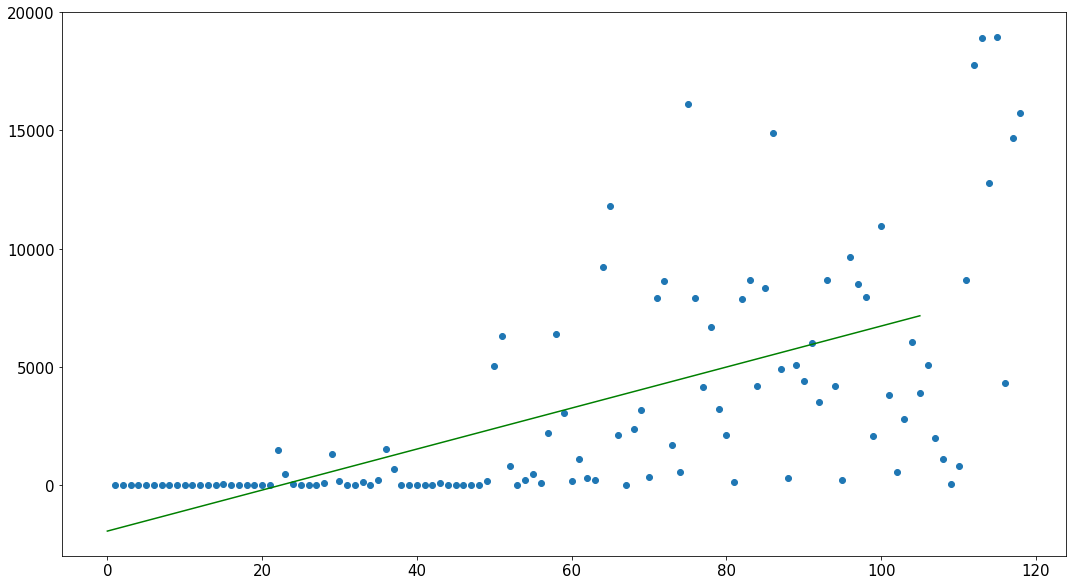

prediccion lineal para el 1 dia despues de la primera dosis: 7075.471793410976
prediccion lineal para los 2 dias despues de la segunda dosis: 7162.199401794616
[-1944.19947849 -1857.4718701  -1770.74426172 -1684.01665334
 -1597.28904495 -1510.56143657 -1423.83382819 -1337.1062198
 -1250.37861142 -1163.65100303 -1076.92339465  -990.19578627
  -903.46817788  -816.7405695   -730.01296112  -643.28535273
  -556.55774435  -469.83013597  -383.10252758  -296.3749192
  -209.64731081  -122.91970243   -36.19209405    50.53551434
   137.26312272   223.9907311    310.71833949   397.44594787
   484.17355625   570.90116464   657.62877302   744.35638141
   831.08398979   917.81159817  1004.53920656  1091.26681494
  1177.99442332  1264.72203171  1351.44964009  1438.17724847
  1524.90485686  1611.63246524  1698.36007363  1785.08768201
  1871.81529039  1958.54289878  2045.27050716  2131.99811554
  2218.72572393  2305.45333231  2392.18094069  2478.90854908
  2565.63615746  2652.36376585  2739.09137423  28

In [24]:
plt.figure(figsize=(18,10))
regr.fit(np.array(x).reshape(-1, 1) ,z)

z_prediccion = regr.predict([[107]]) 

plt.scatter(x,z)

x_real = np.array(range(0, 106)) 
zpred = regr.predict(x_real.reshape(-1, 1))

plt.plot(x_real, zpred, color='green')
plt.show()

print("prediccion lineal para el 1 dia despues de la primera dosis: "+str(zpred[len(zpred)-2]))
print("prediccion lineal para los 2 dias despues de la segunda dosis: "+str(zpred[len(zpred)-1]))
print(zpred)

### EXPONENCIAL

(array([7.88883528e+03, 1.05613933e-01]), array([[ 1.42554633e+06, -7.73220621e-01],
       [-7.73220621e-01,  2.82748209e-06]]))


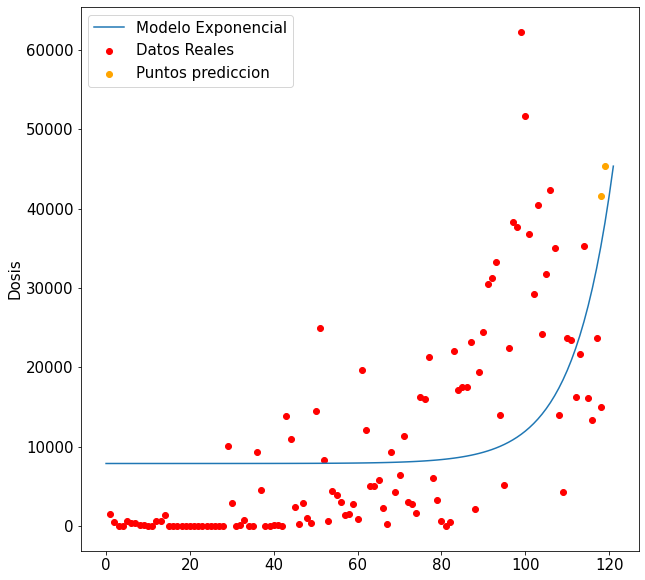

La prediccion para el 1 dia despues de la primera dosis:  41604
La prediccion para del 2 dia despues de la primera dosis:  45360


In [25]:
from scipy.optimize import curve_fit
def exponencial_model(x,a,b):
    return a+b*np.exp(x*b) 

exp_fit = curve_fit(exponencial_model,x,y)
print(exp_fit)


pred_x = list(range(0,max(x)+4))
plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)

plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
puntosreales = [exponencial_model(i,exp_fit[0][0],exp_fit[0][1]) for i in list(range(0,max(x)))]

puntosprediccion = [exponencial_model(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
predi = [round(puntosprediccion[x[len(x)-1]+2]),round(puntosprediccion[x[len(x)-1]+3])]

 
plt.plot(pred_x, puntosprediccion, label="Modelo Exponencial" )
plt.scatter(range(max(x),max(x)+2),predi,label="Puntos prediccion",color="orange")
plt.legend()
plt.ylabel("Dosis")
plt.show()

print("La prediccion para el 1 dia despues de la primera dosis: ",round(puntosprediccion[x[len(x)-1]+2]))
print("La prediccion para del 2 dia despues de la primera dosis: ",round(puntosprediccion[x[len(x)-1]+3]))

(array([1.97761577e+03, 1.00360755e-01]), array([[ 1.43686565e+05, -1.52184219e-01],
       [-1.52184219e-01,  1.03703458e-06]]))


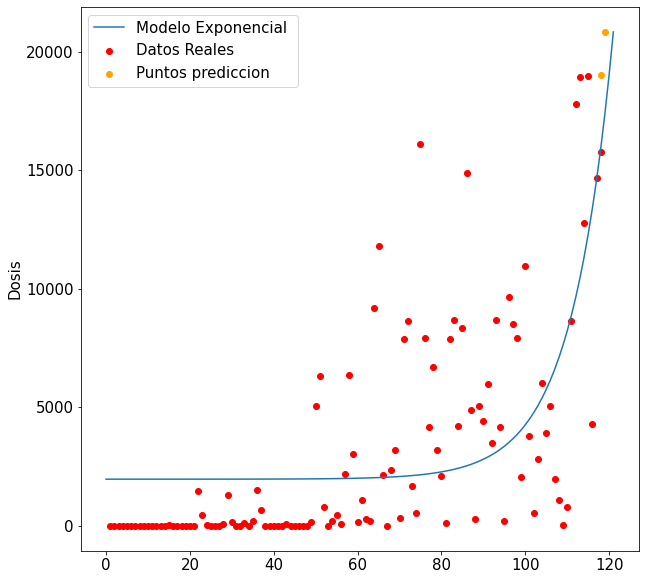

La prediccion para el 1 dia despues de la primera dosis:  19034
La prediccion para del 2 dia despues de la primera dosis:  20835


In [26]:
exp_fit = curve_fit(exponencial_model,x,z)
print(exp_fit)


pred_x = list(range(0,max(x)+4))
plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)

plt.scatter(x,z,label="Datos Reales",color="red")
# Predicted exponential curve
puntosreales = [exponencial_model(i,exp_fit[0][0],exp_fit[0][1]) for i in list(range(0,max(x)))]

puntosprediccion = [exponencial_model(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
predi = [round(puntosprediccion[x[len(x)-1]+2]),round(puntosprediccion[x[len(x)-1]+3])]

 
plt.plot(pred_x, puntosprediccion, label="Modelo Exponencial " )
plt.scatter(range(max(x),max(x)+2),predi,label="Puntos prediccion",color="orange")
plt.legend()

plt.ylabel("Dosis")
plt.show()

print("La prediccion para el 1 dia despues de la primera dosis: ",round(puntosprediccion[x[len(x)-1]+2]))
print("La prediccion para del 2 dia despues de la primera dosis: ",round(puntosprediccion[x[len(x)-1]+3]))

### Polinomial

In [27]:
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures(degree = 4)    #polinomio de grado 4
X = pf.fit_transform(np.array(x).reshape(-1, 1))

plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 

pred_x = list(range(0,max(x)+107))

fil = pf.fit_transform(np.array(pred_x).reshape(-1, 1))

fpredictpol = regresion_lineal.predict(fil)
onlypredicty = [fpredictpol[max(x)+1], fpredictpol[max(x)+2] ]
xpredict = range(max(x)+1,max(x)+3)
plotpol.plot(fil, fpredictpol, color='black')
plotpol.scatter(x,y,label="Reales",color="red")
plotpol.plot(xpredict,onlypredicty, 'ob',label="Prediccion")
plotpol.ylim(0,50000)
plotpol.xlim(0,115) 
plotpol.legend()
plotpol.show()


print("prediccion polinomial para 1 dias despues: "+str(onlypredicty[0]))
print("prediccion polinomial para 2 dias despues: "+str( onlypredicty[1] ))

NameError: name 'plotpol' is not defined

In [ ]:
pf = PolynomialFeatures(degree = 4)    #polinomio de grado 4
X = pf.fit_transform(np.array(x).reshape(-1, 1))

plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, z) 

pred_x = list(range(0,max(x)+107))

fil = pf.fit_transform(np.array(pred_x).reshape(-1, 1))

fpredictpol = regresion_lineal.predict(fil)
onlypredicty = [fpredictpol[max(x)+1], fpredictpol[max(x)+2] ]
xpredict = range(max(x)+1,max(x)+3)
plotpol.plot(fil, fpredictpol, color='black')
plotpol.scatter(x,z,label="Reales",color="red")
plotpol.plot(xpredict,onlypredicty, 'ob',label="Prediccion")
plotpol.ylim(0,17000)
plotpol.xlim(0,170) 
plotpol.legend()
plotpol.show()


print("prediccion polinomial para 1 dias despues: "+str(onlypredicty[0]))
print("prediccion polinomial para 2 dias despues: "+str( onlypredicty[1] ))

### Logarítmico

In [ ]:
from scipy.optimize import curve_fit
def logistic_model(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(logistic_model,x,y) #Extraemos los valores de los paramatros

pred_x = list(range(min(x),max(x)+2))
plt.scatter(x,y,label="Datos Reales",color="red")
plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)
predictf = [logistic_model(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
onlypredict = [ predictf[len(predictf)-2], predictf[len(predictf)-1]]
plt.scatter(range(len(x),len(x)+2),onlypredict)
plt.plot(pred_x, predictf, label="Modelo logarítmico" )
plt.ylabel("Dosis")
plt.ylim(0,30000)
plt.legend()

plt.show()

print("Prediccion logarítmico para el 1 dia despues de la primera dosis:: "+str(predictf[len(predictf)-2]))
print("Prediccion logarítmico para los 2 dias despues de la segunda dosis: "+str( predictf[len(predictf)-1] ))

In [ ]:
exp_fit = curve_fit(logistic_model,x,z) #Extraemos los valores de los paramatros

pred_x = list(range(min(x),max(x)+2))
plt.scatter(x,z,label="Datos Reales",color="red")
plt.rcParams['figure.figsize'] = [10,10]
plt.rc('font', size=15)
predictf = [logistic_model(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
onlypredict = [ predictf[len(predictf)-2], predictf[len(predictf)-1]]
plt.scatter(range(len(x),len(x)+2),onlypredict)
plt.plot(pred_x, predictf, label="Modelo logarítmico" )
plt.ylabel("Dosis")
plt.ylim(0,18000)
plt.legend()

plt.show()

print("Prediccion logarítmico para el 1 dia despues de la primera dosis:: "+str(predictf[len(predictf)-2]))
print("Prediccion logarítmico para los 2 dias despues de la segunda dosis: "+str( predictf[len(predictf)-1] ))